# 第十一次课后练习

**负责助教：胡天成**

<span style="color:red; font-weight:bold;">请将作业文件命名为 第十一次课后练习+姓名+学号.ipynb, 例如 第十一次课后练习+张三+1000000000.ipynb</span>

<span style="color:red; font-weight:bold;">在作业过程中觉得有心得或者自己拓展学习到有价值内容的，可以在文件名最后加一个#号。例如第十一次课后练习+张三+1000000000+#.ipynb</span>

# 第零部分 代码理解

请认真阅读代码，理解代码的功能，先写出预想的结果。运行并检验结果是否如预期。如果不如预期，请分析理解其中的原因

## **0.1** 线性回归

### 一元线性回归

回归截距: w0=[2.70630959]
回归系数: w1=[[1.51702149]]
R2 确定系数：0.9491
均方误差：1.0484
平均绝对值误差：0.7836
中位绝对值误差：0.6502


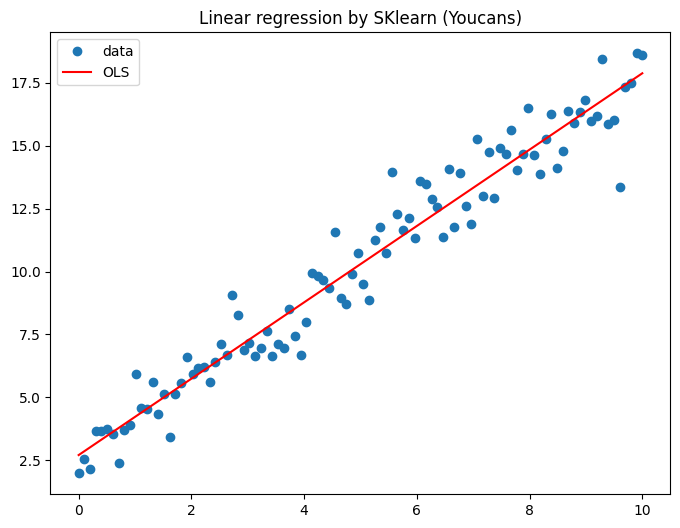

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

# 生成测试数据
nSample = 100
x = np.linspace(0, 10, nSample)  
e = np.random.normal(size=len(x))  
y = 2.36 + 1.58 * x + e  

# 数据转换：输入为 n*1 矩阵，输出为 n*1 数组
x = x.reshape(-1, 1)  
y = y.reshape(-1, 1)

# 一元线性回归（最小二乘法 OLS）
modelRegL = LinearRegression()  
modelRegL.fit(x, y)  
yFit = modelRegL.predict(x)  

# 输出回归结果
print('回归截距: w0={}'.format(modelRegL.intercept_))  # 截距
print('回归系数: w1={}'.format(modelRegL.coef_))        # 回归系数

# 模型评价指标
print('R2 确定系数：{:.4f}'.format(modelRegL.score(x, y)))        
print('均方误差：{:.4f}'.format(mean_squared_error(y, yFit)))     
print('平均绝对值误差：{:.4f}'.format(mean_absolute_error(y, yFit)))  
print('中位绝对值误差：{:.4f}'.format(median_absolute_error(y, yFit))) 

# 绘制结果
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'o', label="data")      # 原始数据点
ax.plot(x, yFit, 'r-', label="OLS")   # 拟合曲线
ax.legend(loc='best')
plt.title('Linear regression by SKlearn (Youcans)')
plt.show()  

预期结果与实际相符. 这部分代码先创建 100 个数据点, y由线性关系加上正态分布的噪声组成, 随后进行预处理并建立模型拟合数据, 最后输出结果以及可视化.

### 多元线性回归


Generated Data Preview:
   difference  advertise      sales
0    3.745071   9.174110  24.519986
1    2.792604   7.221078  27.901688
2    3.971533   6.198654  11.843960
3    5.284545   8.376152  44.209049
4    2.648770  14.429097  55.978672

Model1: Y = b0 + b1*x1 + b2*x2
Intercept: w0=-19.4221
Coefficients: [0.6233 4.6893]
R²: 0.7039
MSE: 77.5651

Model3: Y = b0 + b1*x1 + b2*x2 + b3*x2²
Intercept: w0=-3.2678
Coefficients: [0.6178 1.157  0.1773]
R²: 0.7103
F-statistic: 78.44
p-value: 1.001e-25


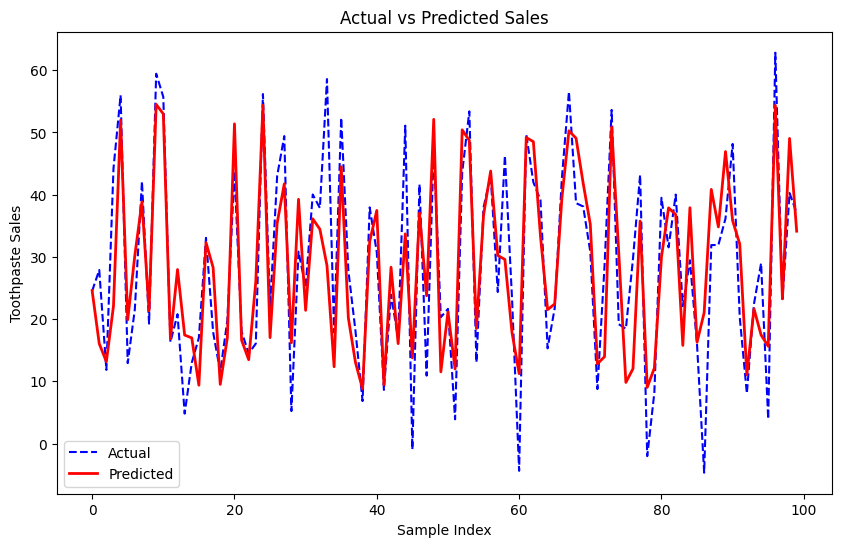

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

def generate_data(n_samples=100):
    """生成模拟牙膏销售数据（更不可预测版本）"""
    np.random.seed(42)
    
    x1 = np.random.normal(3.0, 1.5, n_samples)   
    x2 = np.random.uniform(5.0, 15.0, n_samples) 

    noise = np.random.normal(0, 8, n_samples)    
    y = 0.8*x1 + 0.5*x2 + 0.2*x2**2 + noise       
    
    return pd.DataFrame({
        'difference': x1,
        'advertise': x2,
        'sales': y
    })

def main():
    dfData = generate_data()
    print("\nGenerated Data Preview:")
    print(dfData.head())

    # Model ：Y = b0 + b1*X1 + b2*X2 + e
    feature_cols = ['difference', 'advertise']
    X = dfData[feature_cols]
    y = dfData['sales']
    
    modelRegL = LinearRegression()
    modelRegL.fit(X, y)
    yFit = modelRegL.predict(X)
    
    print("\nModel1: Y = b0 + b1*x1 + b2*x2")
    print('Intercept: w0={:.4f}'.format(modelRegL.intercept_))
    print('Coefficients:', np.round(modelRegL.coef_, 4))
    print('R²: {:.4f}'.format(modelRegL.score(X, y)))
    print('MSE: {:.4f}'.format(mean_squared_error(y, yFit)))

    # Model ：Y = b0 + b1*X1 + b2*X2 + b3*X2² + e
    x1 = dfData['difference']
    x2 = dfData['advertise']
    x5 = x2**2
    X = np.column_stack((x1, x2, x5))
    
    modelRegM = LinearRegression()
    modelRegM.fit(X, y)
    yFit = modelRegM.predict(X)
    
    print("\nModel3: Y = b0 + b1*x1 + b2*x2 + b3*x2²")
    print('Intercept: w0={:.4f}'.format(modelRegM.intercept_))
    print('Coefficients:', np.round(modelRegM.coef_, 4))
    print('R²: {:.4f}'.format(modelRegM.score(X, y)))

    # F检验
    m, n = X.shape[1], X.shape[0]
    yMean = np.mean(y)
    SSR = sum((yFit - yMean)**2)
    SSE = sum((y - yFit)**2)
    Fstats = (SSR/m) / (SSE/(n-m-1))
    print('F-statistic: {:.2f}'.format(Fstats))
    print('p-value: {:.3e}'.format(stats.f.sf(Fstats, m, n-m-1)))

    # 可视化
    plt.figure(figsize=(10,6))
    plt.plot(y.values, 'b--', label='Actual')
    plt.plot(yFit, 'r-', lw=2, label='Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel('Toothpaste Sales')
    plt.title('Actual vs Predicted Sales')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()

预期结果与实际相符. 这段代码先用 `generate_data` 函数生成包含非线性关系的模拟销售数据, 再通过两个不同的模型比较拟合效果, 一个含有二次项而另外一个不含二次项, 最后验证模型整体显著性.

## **0.2** 贝叶斯概率

In [51]:
from collections import defaultdict
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from loguru import logger


class NaiveBayesScratch():
    """朴素贝叶斯算法Scratch实现"""
    def __init__(self):
        # 存储先验概率 P(Y=ck)
        self._prior_prob = defaultdict(float)
        # 存储似然概率 P(X|Y=ck)
        self._likelihood = defaultdict(defaultdict)
        # 存储每个类别的样本在训练集中出现次数
        self._ck_counter = defaultdict(float)
        # 存储每一个特征可能取值的个数
        self._Sj = defaultdict(float)

    def fit(self, X, y):
        """
        模型训练，参数估计使用贝叶斯估计
        X:
        训练集，每一行表示一个样本，每一列表示一个特征或属性
        y:
        训练集标签
        """
        n_sample, n_feature = X.shape
        # 计算每个类别可能的取值以及每个类别样本个数
        ck, num_ck = np.unique(y, return_counts=True)
        self._ck_counter = dict(zip(ck, num_ck))
        for label, num_label in self._ck_counter.items():
            # 计算先验概率，做了拉普拉斯平滑处理，即计算P（y）
            self._prior_prob[label] = (num_label + 1) / (n_sample + ck.shape[0])

        # 记录每个类别样本对应的索引
        ck_idx = []
        for label in ck:
            label_idx = np.squeeze(np.argwhere(y == label))
            ck_idx.append(label_idx)

        # 遍历每个类别
        for label, idx in zip(ck, ck_idx):
            xdata = X[idx]
            # 记录该类别所有特征对应的概率
            label_likelihood = defaultdict(defaultdict)
            # 遍历每个特征
            for i in range(n_feature):
                # 记录该特征每个取值对应的概率
                feature_val_prob = defaultdict(float)
                # 获取该列特征可能的取值和每个取值出现的次数
                feature_val, feature_cnt = np.unique(xdata[:, i], return_counts=True)
                self._Sj[i] = feature_val.shape[0]
                feature_counter = dict(zip(feature_val, feature_cnt))
                for fea_val, cnt in feature_counter.items():
                    # 计算该列特征每个取值的概率，做了拉普拉斯平滑，即为了计算P（x|y）
                    feature_val_prob[fea_val] = (cnt + 1) / (self._ck_counter[label] + self._Sj[i])
                label_likelihood[i] = feature_val_prob
            self._likelihood[label] = label_likelihood

    def predict(self, x):
        """
        输入样本，输出其类别，本质上是计算后验概率
        **注意计算后验概率的时候对概率取对数**，概率连乘可能导致浮点数下溢，取对数将连乘转化为求和
        """
        # 保存分类到每个类别的后验概率，即计算P（y|x）
        post_prob = defaultdict(float)
        # 遍历每个类别计算后验概率
        for label, label_likelihood in self._likelihood.items():
            prob = np.log(self._prior_prob[label])
            # 遍历样本每一维特征
            for i, fea_val in enumerate(x):
                feature_val_prob = label_likelihood[i]
                # 如果该特征值出现在训练集中则直接获取概率
                if fea_val in feature_val_prob:
                    prob += np.log(feature_val_prob[fea_val])
                else:
                    # 如果该特征没有出现在训练集中则采用拉普拉斯平滑计算概率
                    laplace_prob = 1 / (self._ck_counter[label] + self._Sj[i])
                    prob += np.log(laplace_prob)
            post_prob[label] = prob
        prob_list = list(post_prob.items())
        prob_list.sort(key=lambda v: v[1], reverse=True)
        # 返回后验概率最大的类别作为预测类别
        return prob_list[0][0]


def main():
    X, y = load_iris(return_X_y=True)
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, shuffle=True)

    model = NaiveBayesScratch()
    model.fit(xtrain, ytrain)

    n_test = xtest.shape[0]
    n_right = 0
    for i in range(n_test):
        y_pred = model.predict(xtest[i])
        if y_pred == ytest[i]:
            n_right += 1
        else:
            print("该样本真实标签为：{}, 但是Scratch模型预测标签为:{}".format(ytest[i], y_pred))
    print("Scratch模型在测试集上的准确率为:{}%".format(n_right * 100 / n_test))

if __name__ == "__main__":
 main()

该样本真实标签为：2, 但是Scratch模型预测标签为:1
该样本真实标签为：1, 但是Scratch模型预测标签为:2
该样本真实标签为：1, 但是Scratch模型预测标签为:2
Scratch模型在测试集上的准确率为:90.0%


预测结果与实际相符. 这部分代码实现了一个朴素贝叶斯分类器的手写版本, 用 `fit` 方法训练数据和标签, 用 `predict` 方法返回最大后验概率对应的类别, 并在经典的鸢尾花数据集上进行测试.

## **0.3** SVM二分类

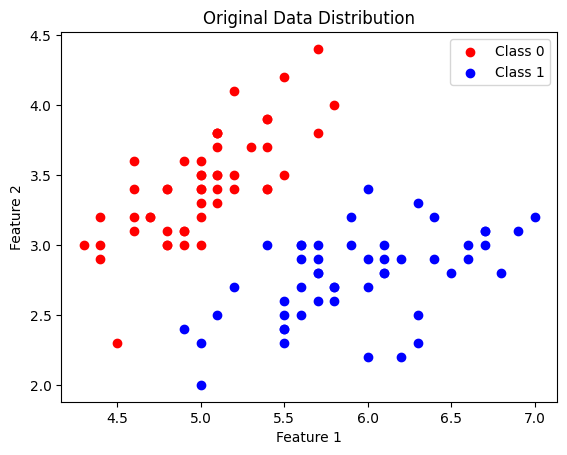

In [ ]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC 
from matplotlib.colors import ListedColormap  

# 使用鸢尾花数据集，只取前两个特征（方便可视化），且只保留两个类别（0和1）
iris = datasets.load_iris()
x = iris.data  
y = iris.target  


x = x[y<2, :2]  
y = y[y<2] 

plt.scatter(x[y==0, 0], x[y==0, 1], color='red', label='Class 0') 
plt.scatter(x[y==1, 0], x[y==1, 1], color='blue', label='Class 1')  
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2')  
plt.legend()  
plt.title('Original Data Distribution')
plt.show()


预测结果与实际相符. 这部分代码加载鸢尾花数据集, 并筛选出前两个类别和特征, 最后可视化. 

/var/folders/tp/rz1vj6rj31dd3yyrmn147f9r0000gn/T/ipykernel_98726/1198209629.py:23: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


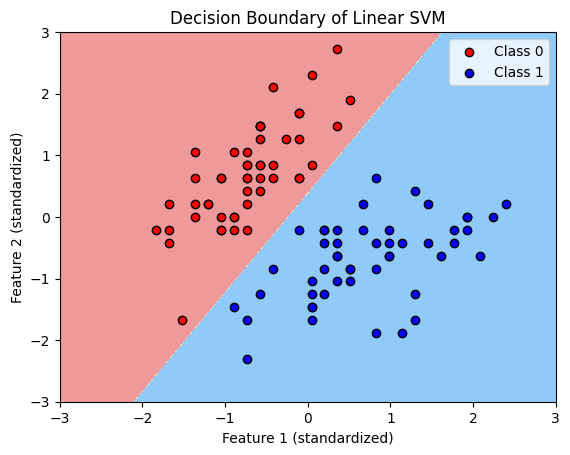

In [22]:
# 数据预处理：标准化
standardscaler = StandardScaler() 
standardscaler.fit(x) 
x_standard = standardscaler.transform(x) 

# 训练线性支持向量机模型
svc = LinearSVC(C=1e9) 
svc.fit(x_standard, y)  

# 定义决策边界绘制函数
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]  

    y_predict = model.predict(x_new)  
    zz = y_predict.reshape(x0.shape)  
    
    # 绘制决策区域
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])  
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  

# 可视化决策边界和数据点
plot_decision_boundary(svc, axis=[-3, 3, -3, 3]) 
plt.scatter(x_standard[y==0, 0], x_standard[y==0, 1], color='red', edgecolor='black', label='Class 0')  
plt.scatter(x_standard[y==1, 0], x_standard[y==1, 1], color='blue', edgecolor='black', label='Class 1') 
plt.xlabel('Feature 1 (standardized)')  
plt.ylabel('Feature 2 (standardized)') 
plt.title('Decision Boundary of Linear SVM') 
plt.legend()  # 显示图例
plt.show()  # 显示图像

预测结果与实际相符. 这一部分代码先对原始数据 x 进行标准化处理, 随后训练线性 SVM 模型, 接下来定义决策边界函数, 用不同颜色区域代表模型对不同类别的预测结果, 最后进行可视化.

/var/folders/tp/rz1vj6rj31dd3yyrmn147f9r0000gn/T/ipykernel_98726/1198209629.py:23: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


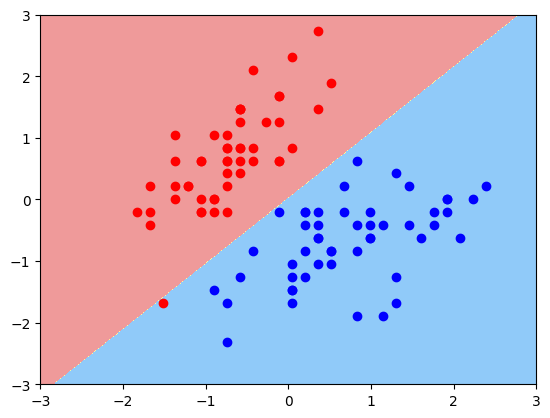

In [23]:
# 对比一个较小的C值
svc2 = LinearSVC(C=0.01)
svc2.fit(x_standard, y)
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(x_standard[y==0, 0], x_standard[y==0, 1], color='red')
plt.scatter(x_standard[y==1, 0], x_standard[y==1, 1], color='blue')
plt.show()


预测结果与实际相符. 这里使用较小的正则化参数重新训练, 允许部分误分类以换取更大的分类间隔, 决策边界更松弛.

## **0.4** 线性不可分支持SVM
1. 尝试使用线性分类器对circle数据集进行划分
2. 多次使用该线性分类器，观察能否较好地进行分类
3. 观察数据在高维空间下的映射
4. 使用高斯核函数

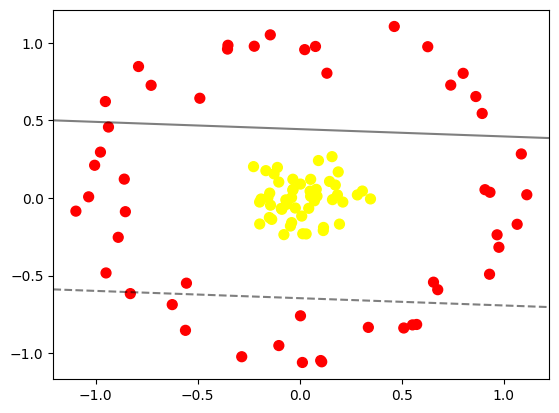

In [67]:
from sklearn.svm import SVC
from sklearn.datasets import make_circles

def plot_SVC_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()  
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
 
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
 
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])  

 
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

X, y = make_circles(100, factor=0.1, noise=0.1)
     
clf = SVC(kernel='linear')
clf.fit(X, y)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_SVC_decision_function(clf)

预期结果与实际相符. 这部分代码生成两个同心圆构成的非线性可分数据集, 并展示线性 SVM 在非线性数据上的局限性, 并进行可视化.

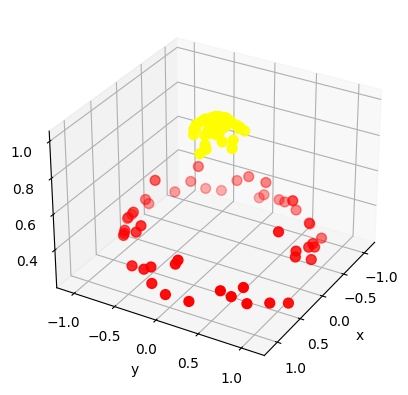

In [70]:
def plot_3D(X, y, elev=30, azim=30):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

plot_3D(elev=30, azim=30, X=X, y=y)

预期结果与实际相符. 这部分代码将低维非线性可分数据映射到高维空间实现线性可分, 将二维数据映射到转换为三维空间中可线性分割的伞状分布, 并进行可视化. 

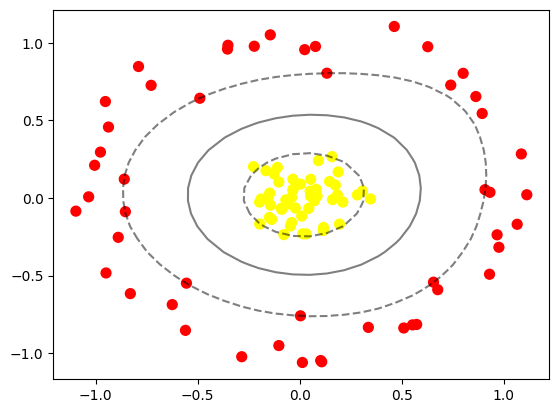

In [71]:
# 引入高斯核函数
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_SVC_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

预测结果与实际相符. 这部分代码更换核函数为非线性核, 并进行可视化, 同时支持向量标识.

# 第一部分 代码填空

## **1.1** 线性回归

假设你是一家餐厅的领导，正在考虑在不同的城市开设新的分店。该连锁店已经在不同的城市有了餐车，并且你能够获得每个城市的人口和利润数据。
现在需要使用这些数据来帮助你选择下一个被扩展的城市。文件ex1data1.txt包含线性回归问题的数据集。第一列数据对应城市人口，第二列数据对应那座城市的餐车的利润。利润为负时表示亏损。

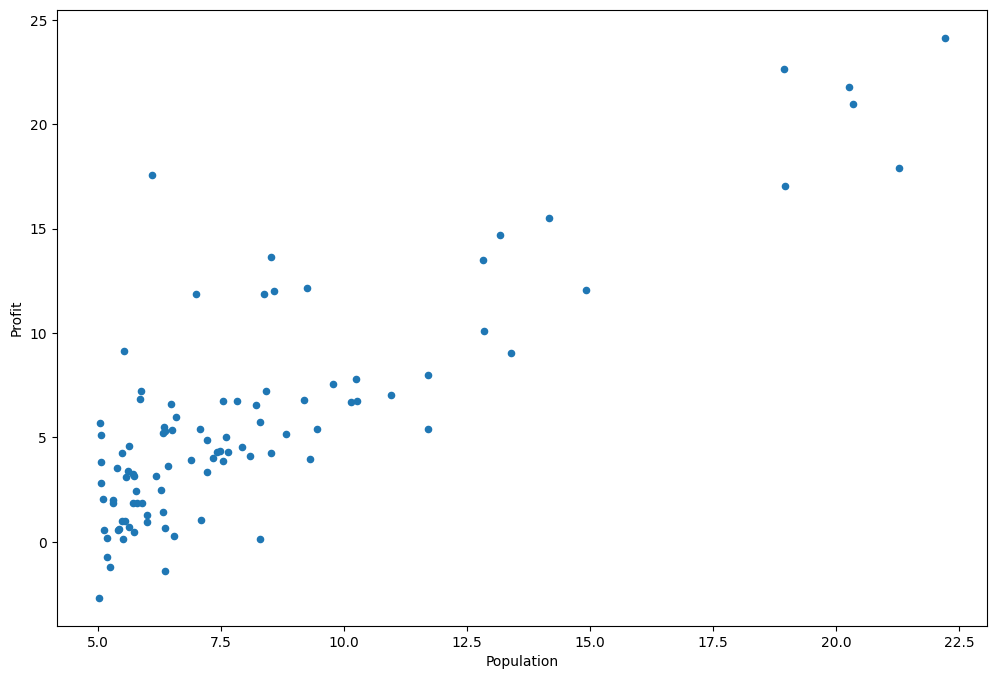

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

data.describe()

data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

在该部分练习任务中，你需要实现一个计算成本 𝐽(𝜃) 的函数computeCost，用于检查梯度下降实现的收敛性。 其中，X和y不是标量值，而是矩阵，其行代表训练集中的示例。计算结果应为32.07

![jupyter](./cost_function.png)

In [ ]:
# 新增一例，x0
data.insert(0, 'Ones', 1)

cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
Y = data.iloc[:, cols-1:cols]

# 将数据转换为矩阵
X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta = np.matrix([0.0, 0.0])  # 初始参数

# 代价函数
def computeCost(X, Y, theta):
    """计算线性回归的代价函数"""
    m = len(X)
    predictions = X * theta.T
    sqErrors = np.power(predictions - Y, 2)
    return np.sum(sqErrors) / (2 * m)

computeCost(X, Y, theta)

32.072733877455676

接下来，我们将实现梯度下降,梯度下降的计算公式如下：

![gradientDescent](./gradientDescent.png)

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

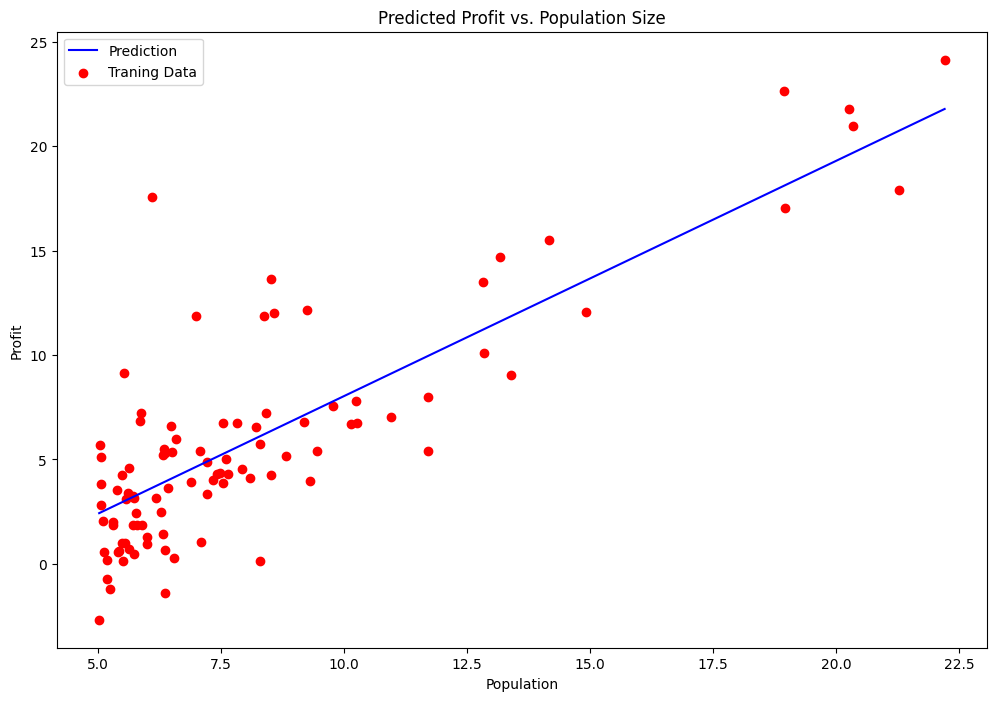

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    """执行梯度下降算法"""
    m = len(X)
    cost_history = np.zeros(iters)
    
    # Gradient Descent
    for i in range(iters):
        error = X * theta.T - y
        gradient = (X.T * error).T / m  # 计算梯度
        theta = theta - alpha * gradient  # 更新参数
        cost_history[i] = computeCost(X, y, theta)
        
    return theta, cost_history

alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, Y, theta, alpha, iters)
computeCost(X, Y, g)
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'b', label='Prediction')
ax.scatter(data.Population, data.Profit, c='red',label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

## **1.2** 朴素贝叶斯手写数字分类器实现

请补全以下基于朴素贝叶斯算法实现 MNIST 手写数字分类的代码。代码包含以下关键步骤：

1. 数据预处理（二值化）
2. 先验概率计算（带贝叶斯估计）
3. 条件概率计算（带贝叶斯估计）
4. 分类预测
5. 生成模型可视化


Training...

Testing...
Test Accuracy: 0.8413

Generating digit patterns...


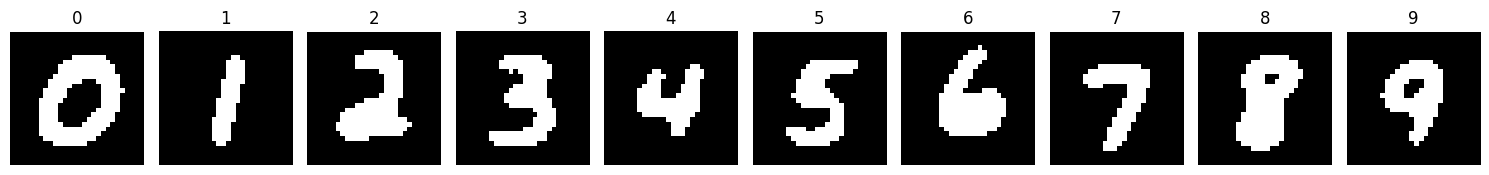

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

# ====================== 本地加载MNIST数据集 ======================
def load_mnist_local(path='mnist.npz'):
    """直接从本地npz文件加载MNIST数据集"""
    with np.load(path) as data:
        train_data = data['x_train']
        train_label = data['y_train']
        test_data = data['x_test']
        test_label = data['y_test']
    return (train_data, train_label), (test_data, test_label)

# 加载数据（假设mnist.npz在当前目录或指定路径）
(train_data, train_label), (test_data, test_label) = load_mnist_local('mnist.npz')

# ====================== 参数配置 ======================
train_length = 60000    # 训练集样本量
test_length = 10000     # 测试集样本量
size = 28 * 28          # 图像展平后的特征维度
data_kind = 10          # 类别数（0-9）
choice = 2              # 特征二值化选项（0/1）
lam = 1                 # 贝叶斯估计平滑系数

# ====================== 数据预处理 ======================
def binarize(data):
    """将灰度图像二值化为0/1,像素值>0置1，否则保持0"""
    # TODO

# 训练集处理
train_data = train_data[:train_length].reshape(train_length, size)
train_data = binarize(train_data)
train_label = train_label[:train_length].astype(np.int8)

# 测试集处理
test_data = test_data[:test_length].reshape(test_length, size)
test_data = binarize(test_data)
test_label = test_label[:test_length].astype(np.int8)

P_con = np.zeros((data_kind, size, choice))  
P_pre = np.zeros(data_kind)                  

# ====================== 先验概率计算 ======================
def compute_prior(label, P_init, lamda=1):
    """计算带平滑的先验概率 P(Y=ck)"""
    # 统计各类别出现次数
    for la in label:
        P_init[la] += 1

    # 贝叶斯估计公式
    P_init = (P_init + lamda) / (len(label) + data_kind * lamda)
    return 

# ====================== 条件概率计算 ======================
def compute_conditional(data, label, P_init, lamda=1):
    """计算带平滑的条件概率 P(Xj=ajl|Y=ck)"""
    con = P_init.copy()
    summ = np.zeros(data_kind)  # 各类别样本数统计
    
    # 对每个类别进行计算
    for c in range(data_kind):
        # 选取属于类别 c 的样本
        data_c = data[label == c]
        n_c = data_c.shape[0]
        if n_c == 0:
            continue
        # 针对二值化后特征，统计每个像素为1的次数
        count_one = np.sum(data_c, axis=0)
        # 统计为0的次数：n_c - count_one
        count_zero = n_c - count_one
        
        # 应用贝叶斯平滑
        con[c, :, 1] = (count_one + lamda) / (n_c + lamda * choice)
        con[c, :, 0] = (count_zero + lamda) / (n_c + lamda * choice)
    return con

# ====================== 模型训练 ======================
print("Training...")
P_pre = compute_prior(train_label, P_pre, lamda=lam)
P_con = compute_conditional(train_data, train_label, P_con, lamda=lam)

# ====================== 分类预测 ======================
def bayes_predict(prior, cond_prob, test, true_label):
    """贝叶斯分类预测"""
    acc = 0
    predictions = np.full(test.shape[0], -1)
    prob_matrix = np.ones((test.shape[0], prior.shape[0]))  # 后验概率矩阵
    
    # 计算对数后验概率
    for sample_idx, sample in enumerate(test):
        for c in range(prior.shape[0]):
            log_prob = np.log(prior[c] + 1e-10)  # 防止log(0)
            for j in range(size):
                log_prob += np.log(cond_prob[c, j, sample[j]] + 1e-10)
            prob_matrix[sample_idx, c] = log_prob
    
    # 确定预测类别
    for idx in range(prob_matrix.shape[0]):
        pred = np.argmax(prob_matrix[idx])
        predictions[idx] = pred
        if pred == true_label[idx]:
            acc += 1
            
    return acc / true_label.size, predictions

# ====================== 模型测试 ======================
print("\nTesting...")
accuracy, preds = bayes_predict(P_pre, P_con, test_data, test_label)
print(f"Test Accuracy: {accuracy:.4f}")

# ====================== 生成模型可视化 ======================
def generate_digit_image(target_class, prior, cond_prob, img_size=784):
    """生成最像目标类别的数字图像"""
    generated = np.zeros(img_size)
    for pixel in range(img_size):
        # 临时修改像素值测试概率
        temp = generated.copy()
        temp[pixel] = 1
        # 计算两种状态的概率
        p0 = np.prod([cond_prob[target_class, i, int(generated[i])] for i in range(img_size)]) * prior[target_class]
        p1 = np.prod([cond_prob[target_class, i, int(temp[i])] for i in range(img_size)]) * prior[target_class]
        generated[pixel] = 1 if p1 > p0 else 0
    return generated.reshape(28, 28)

# 可视化生成结果
print("\nGenerating digit patterns...")
plt.figure(figsize=(15, 3))
for digit in range(10):
    ax = plt.subplot(1, 10, digit+1)
    ax.imshow(generate_digit_image(digit, P_pre, P_con), cmap='gray')
    ax.axis('off')
    ax.set_title(str(digit))
plt.tight_layout()
plt.show()